In [1]:
import numpy as np
import matplotlib.pyplot as plt
import primed_utils
from primed_data_processing.cellbuilder import CellBuilder

# Import Data

In [2]:
# instantiate CellBuilder
cell_builder = CellBuilder()

# raws_prepath = 'path/to/raws/'
raws_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/'
T10_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'
T15_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

# all channel and cell numbers from B6 in order
channel_numbers = (1,2,3,4,9,10,11,12,13,14,15,16)
cell_numbers = (9,10,11,12,1,2,3,4,5,6,7,8)
steps = {'characterization': [10,13,15]}

# load Arbin data
batch = primed_utils.load_B6T10(cell_builder, raws_prepath, channel_numbers, cell_numbers, steps)
# load Gamry data
eis_cells = primed_utils.load_B6T10_eis(T10_file_prepath, T15_file_prepath, channel_numbers, cell_numbers)
# Merge Data together
cell_builder.merge_B6_eis_data(eis_cells, batch[:])

Processing channel 1
Processing channel 2
Processing channel 3
Processing channel 4
Processing channel 9
Processing channel 10
Processing channel 11
Processing channel 12
Processing channel 13
Processing channel 14
Processing channel 15
Processing channel 16
Warning... File B6T10V0_Chan0011_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0041_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0043_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0045_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0011_Cycle0047_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0035_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0037_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle0039_Step014.DTA doesn't exist!
Warning... File B6T10V0_Chan0016_Cycle004

# Data Processing

In [10]:
primed_utils.assign_cell_cycle_numbers(batch)

# calculate and assign SOH's to all of the steps
primed_utils.assign_soh(10, 10, 4, batch)
primed_utils.assign_soh(13, 10, 4, batch)
primed_utils.assign_soh(14, 10, 4, batch)
primed_utils.assign_soh(15, 10, 4, batch)

primed_utils.assign_temp(14, 13, batch)
primed_utils.get_first_quadrant_data(14, batch)
eis_temp_filtered = primed_utils.filter_by_temp(14, (20,23), batch)
eis_soh_temp_filtered = primed_utils.filter_by_soh(eis_temp_filtered, 1)

# Plotting Functions

In [12]:
def plot_eis_cells(x_lim,y_lim, batch):
    for cell in batch[:]:
        fig = plt.figure(figsize=(10,5))
        for cycle in cell:
            try:
                step = cycle[14][0]
                plt.plot(step.first_dict["Zreal (ohm)"], np.array(step.first_dict["Zimag (ohm)"])*-1, label=f"temp {round(step.temperature)} soh {round(step.soh,2)}")
            except IndexError:
                pass
        plt.title(f"Channel {cell.channel_number}")
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        plt.legend()
    plt.show()

def plot_eis_steps(steps, x_lim, y_lim,save=False):
    fig_num = 1
    for idx, key in enumerate(steps.keys()):
        if not steps[key]: continue
        if idx % 2 == 0:
            fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
        for step in steps[key]:
            col = idx % 2
            ax[col].plot(step.first_dict["Zreal (ohm)"], np.array(step.first_dict["Zimag (ohm)"])*-1, label=f"temp {round(step.temperature)} soh {round(step.soh,2)}, chan {step.channel_number}")
            ax[col].set_title(f"SOH {round(key,2)} - {round(key+0.01,2)}")
            ax[col].set_xlim(x_lim)
            ax[col].set_ylim(y_lim)
            ax[col].legend()
        fig.supylabel("Z imaginary (Ohm)")
        fig.supxlabel("Z real (Ohm)")
        if save and idx % 2 == 1:
            fig.savefig(f"../Images/eis_by_soh{fig_num}")
            fig_num += 1
        # plt.show()

# Plotting

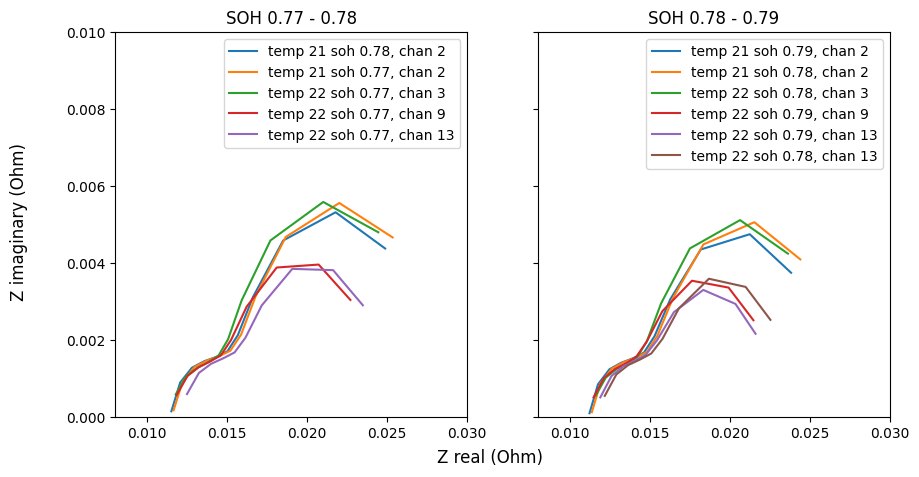

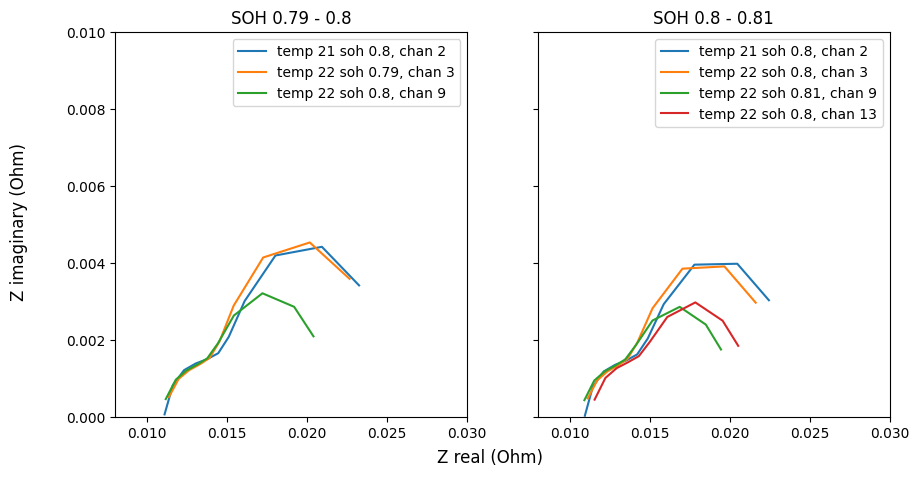

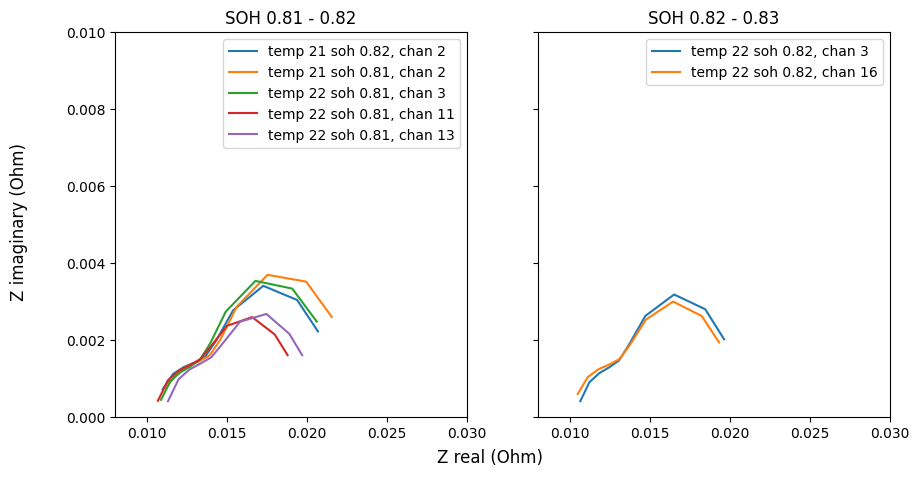

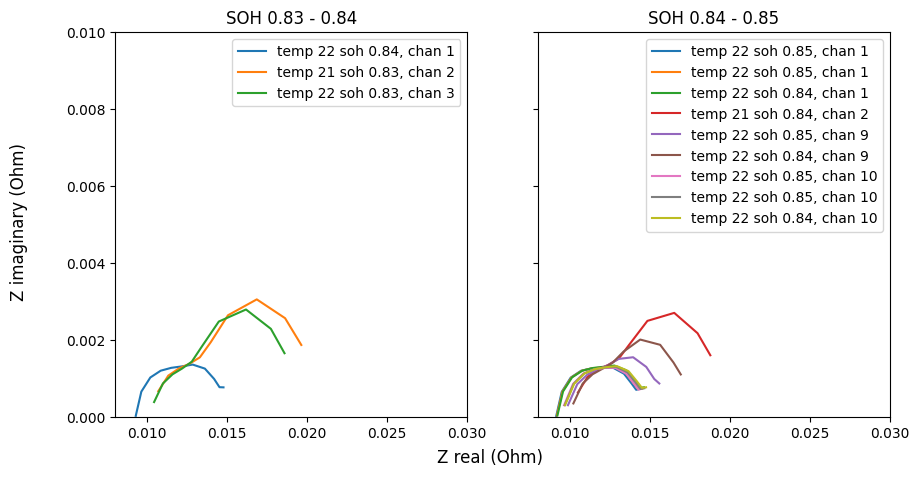

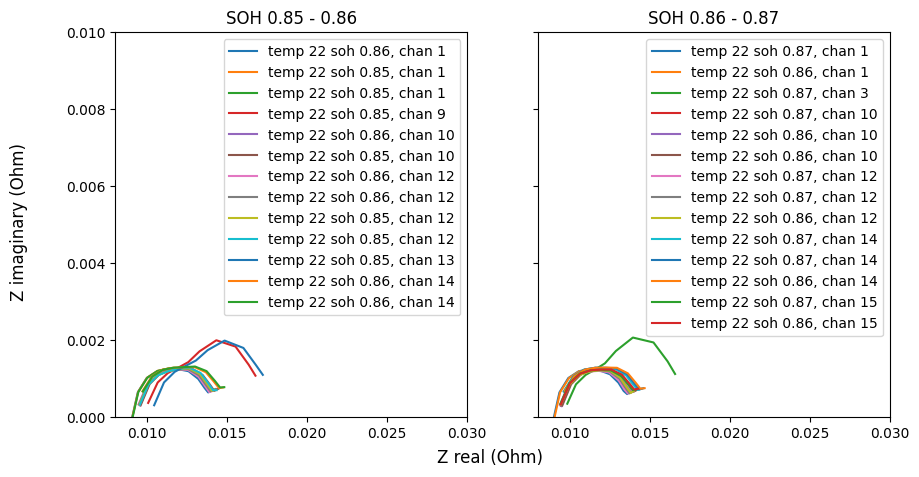

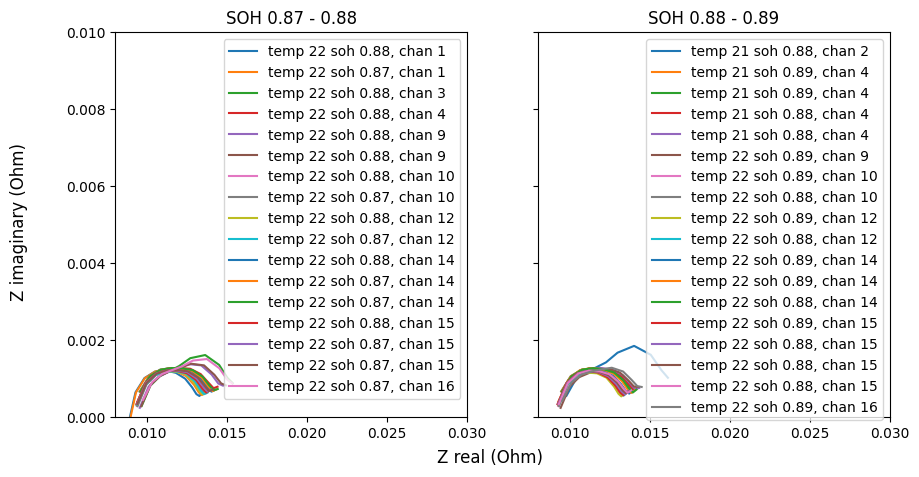

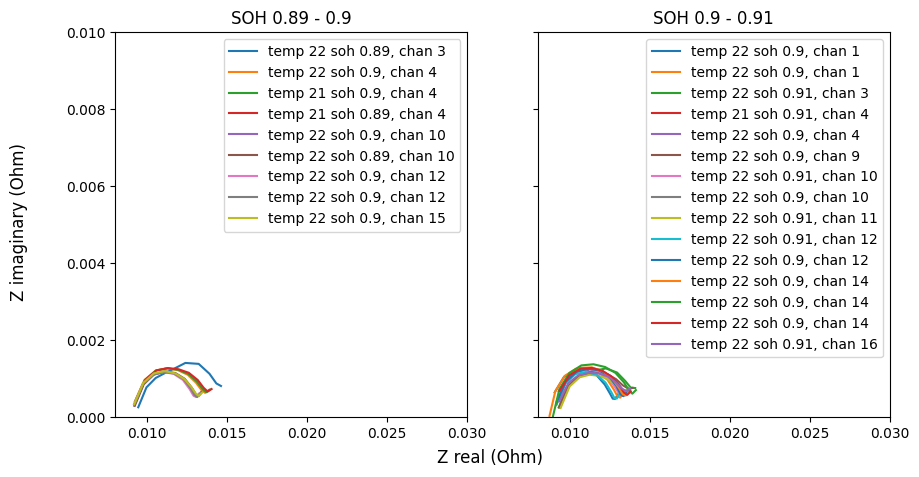

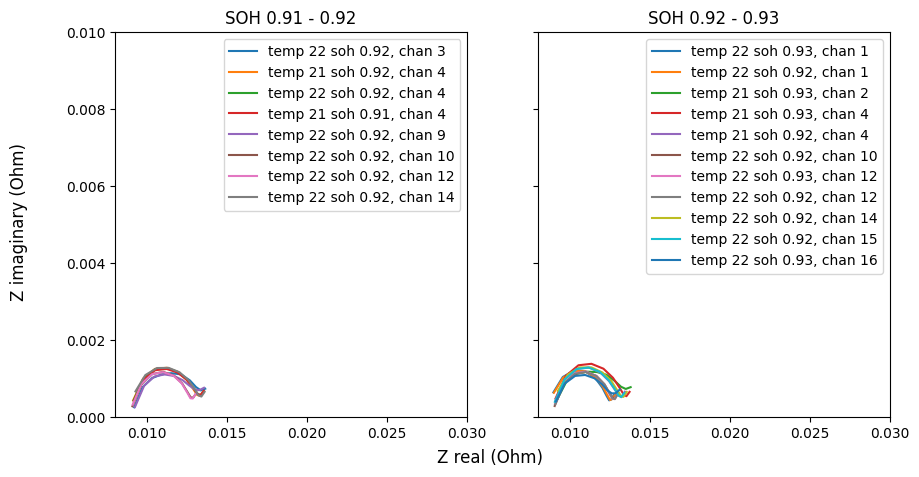

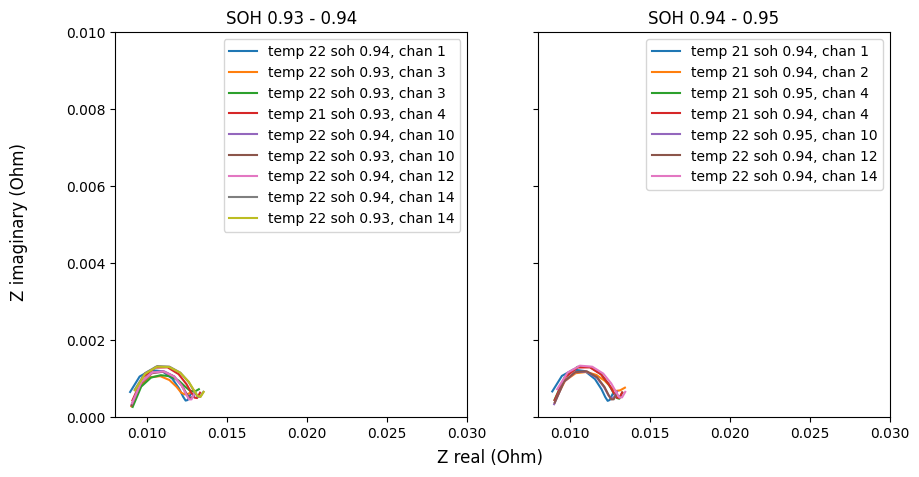

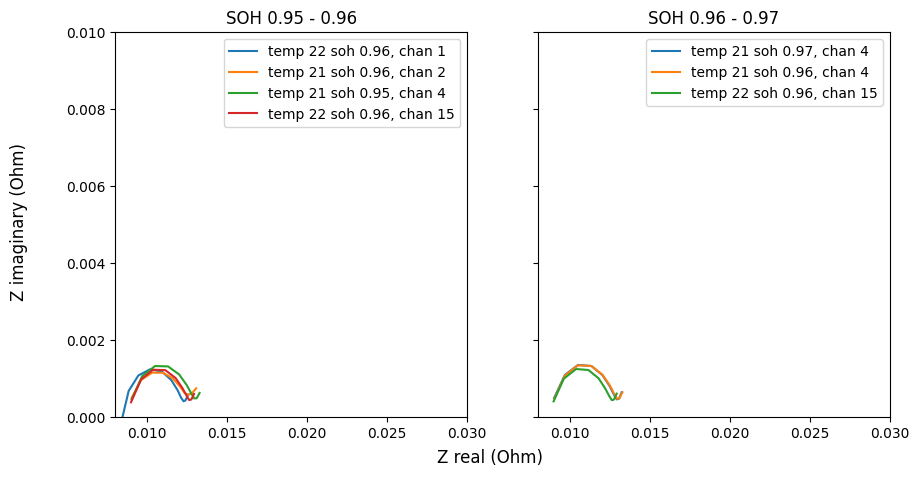

In [13]:
plot_eis_steps(eis_soh_temp_filtered, (0.008,0.030), (0,0.010))